## Analytical examples
This tutorial illustrates how to define
u,v velocities from two analytical fields:
1) field from a saddle point
2) field around a peninsula (see in testFields.py for u,v computation)

Both example also show various particle initialization (see ParticleSet.ipynb for more details)

## Import librairies

In [1]:
from lamta.Diagnostics import ParticleSet
import numpy as np
import matplotlib.pyplot as plt

Define saddle field

In [2]:
def saddle(self,t,x,y):
    Lambda=1.1
    Mu=-2.0
    xp=Lambda*x
    yp=Mu*y
    return xp,yp

Set two particles at positions px,py and time pt from user input

In [3]:
pt = np.array([0,1]) #time is expressed in days
numd = pt[1]- pt[0] #number of days for the integration
px = np.array([1,-1])
py = np.array([3,3])
pset = ParticleSet.from_input(pt,px,py,numdays=numd) #if numdays is not defined: default is 1
print(pset.pt,pset.px,pset.py)

[0 1] [ 1 -1] [3 3]


Trajectories advected with Runga-Kutta 1 with saddle field and time step=10

In [4]:
numstep = 10
trjf = pset.rk1flat(saddle,numstep)
print(trjf) #lons,lats = initial x,y positions; trjx,trjy = trajectories; lonf,latf = final x,y positions

{'lons': array([ 1, -1]), 'lats': array([3, 3]), 'trjx': [array([ 1, -1]), array([ 1.11, -1.11]), array([ 1.2321, -1.2321]), array([ 1.367631, -1.367631]), array([ 1.51807041, -1.51807041]), array([ 1.68505816, -1.68505816]), array([ 1.87041455, -1.87041455]), array([ 2.07616015, -2.07616015]), array([ 2.30453777, -2.30453777]), array([ 2.55803692, -2.55803692]), array([ 2.83942099, -2.83942099])], 'trjy': [array([3, 3]), array([2.4, 2.4]), array([1.92, 1.92]), array([1.536, 1.536]), array([1.2288, 1.2288]), array([0.98304, 0.98304]), array([0.786432, 0.786432]), array([0.6291456, 0.6291456]), array([0.50331648, 0.50331648]), array([0.40265318, 0.40265318]), array([0.32212255, 0.32212255])], 'lonf': [array([ 2.83942099, -2.83942099])], 'latf': [array([0.32212255, 0.32212255])]}


Plot trajectories

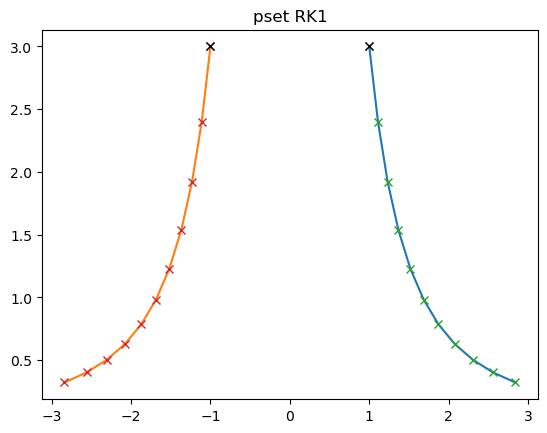

In [5]:
plt.figure()
plt.plot(trjf['trjx'],trjf['trjy'])
plt.plot(trjf['trjx'],trjf['trjy'],'x')
plt.plot(trjf['trjx'][0],trjf['trjy'][0],'kx') #plot init
plt.title('pset RK1')
plt.show()

Extend to 2 days of advection

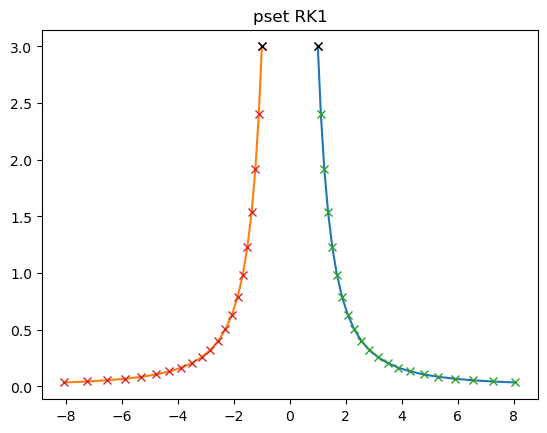

In [6]:
pt = np.array([0,2]) #time is expressed in days
numd = 2 #number of days for the integration
pset = ParticleSet.from_input(pt,px,py,numdays=numd) #if numdays is not defined: default is 1
numstep = 10
trjf = pset.rk1flat(saddle,numstep)
#Plot trajectories
plt.figure()
plt.plot(trjf['trjx'],trjf['trjy'])
plt.plot(trjf['trjx'],trjf['trjy'],'x')
plt.plot(trjf['trjx'][0],trjf['trjy'][0],'kx') #plot init
plt.title('pset RK1')
plt.show()

Initiate more particle (see ParticleSet.ipynb)

In [7]:
numdays = 1
loni = [-3,3]
lati = [-3,3]
delta0 = 1
dayv = None
pset = ParticleSet.from_grid(numdays,loni,lati,delta0,dayv)

Trajectories advected with RK4

In [8]:
trjf = pset.rk4flat(saddle,numstep)
print(trjf['lonf'],trjf['latf']) #show final positions

[array([-0.99861472, -0.66574315, -0.33287157,  0.        ,  0.33287157,
        0.66574315, -0.99861472, -0.66574315, -0.33287157,  0.        ,
        0.33287157,  0.66574315, -0.99861472, -0.66574315, -0.33287157,
        0.        ,  0.33287157,  0.66574315, -0.99861472, -0.66574315,
       -0.33287157,  0.        ,  0.33287157,  0.66574315, -0.99861472,
       -0.66574315, -0.33287157,  0.        ,  0.33287157,  0.66574315,
       -0.99861472, -0.66574315, -0.33287157,  0.        ,  0.33287157,
        0.66574315])] [array([-22.16666772, -22.16666772, -22.16666772, -22.16666772,
       -22.16666772, -22.16666772, -14.77777848, -14.77777848,
       -14.77777848, -14.77777848, -14.77777848, -14.77777848,
        -7.38888924,  -7.38888924,  -7.38888924,  -7.38888924,
        -7.38888924,  -7.38888924,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         7.38888924,   7.38888924,   7.38888924,   7.38888924,
         7.38888924,   7.388889

Plot trajectories

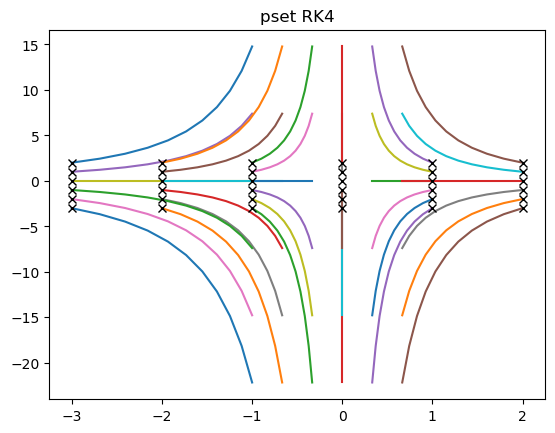

In [9]:
plt.figure()
plt.plot(trjf['trjx'],trjf['trjy'])
plt.plot(trjf['trjx'][0],trjf['trjy'][0],'kx') #plot ini
plt.title('pset RK4')
plt.show()

Peninsula example

In [10]:
from testFields import peninsula
from lamta.Diagnostics import Lagrangian,ParticleSet
import numpy as np
import matplotlib.pyplot as plt

#load u,v field around peninsula
field = peninsula()

# Particle intialization from user input
pt = np.array([0,200])
px = np.array([200,200,200,200])
py = np.array([15,35,55,75])
numd = 200
pset = ParticleSet.from_input(pt,px,py,fieldset=field,numdays=numd,xy='xy') #u,v field is given as argument to be saved in pset object
#print(pset.u,pset.v) #show u,v field
#print(pset.lon)

c:\Users\lloyd\Desktop\lagrangian_dev\LAMTA_examples\notebooks\testFields.py:22: RuntimeWarning: invalid value encountered in scalar divide
  psi[i,j] = (u0*R**2*y[j]/((x[i]-x0)**2 + y[j]**2)) - u0*y[j]
C:\Users\lloyd\Desktop\lagrangian_dev\LAMTA\lamta\Diagnostics.py:1182: UserWarning: Warning: x and y data are not lon/lat
  warnings.warn("Warning: x and y data are not lon/lat")


Trajectories using RK4 method

In [11]:
numstep = 4
trjf = pset.rk4flat(Lagrangian.interpf,numstep)
x,y = np.asarray(trjf['trjx']),np.asarray(trjf['trjy'])

Plot field and trajectories

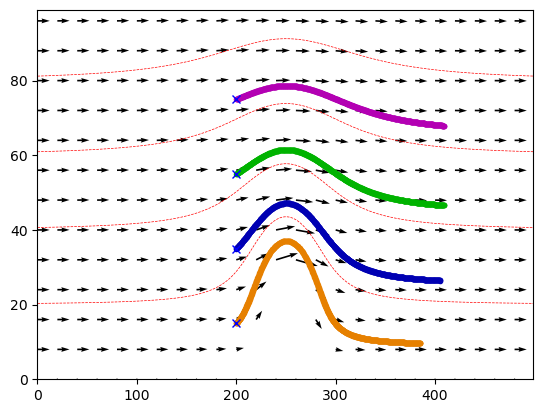

In [12]:
col = [[0.9,0.5,0],[0,0,0.7],[0,0.7,0],[0.7,0,0.7]]
plt.figure()
plt.contour(field['lon'],field['lat'],field['psi'],levels=np.arange(-80,0,20),colors='red',linewidths=0.5)
plt.quiver(field['lon'][0:500:20,0:100:8],field['lat'][0:500:20,0:100:8],field['u'][0:500:20,0:100:8],
           field['v'][0:500:20,0:100:8],scale=40)
for i in range(4):
    plt.plot(x[:,i],y[:,i],color=col[i])
    plt.plot(x[:,i],y[:,i],'.',color=col[i])
plt.plot(trjf['trjx'][0],trjf['trjy'][0],'bx')
plt.show()